In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from tqdm import tqdm

In [2]:
transactions = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/transaction_data.csv")

In [5]:
weekly = transactions.groupby(["household_key", "WEEK_NO"])["SALES_VALUE"].sum()

In [35]:
transactions["WEEK_NO"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  35,  34,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

In [43]:
def find_trend(data):
    data = data.rename("count").sort_index().reset_index()
    model = LinearRegression()
    X = data["WEEK_NO"].to_numpy() / 102
    y = data["count"].to_numpy()
    model.fit(X.reshape(-1,1),y.reshape(-1,1))
    return (model.coef_[0][0])
    

In [44]:
tqdm.pandas("applying")

/home/radeusgd/Anaconda3/envs/ada/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [45]:
trends = weekly.groupby("household_key").progress_apply(find_trend)

100%|██████████| 2500/2500 [00:07<00:00, 352.54it/s]


In [46]:
trends

household_key
1         9.562239
2        41.049878
3      -108.767227
4       -82.202664
5       -33.367516
           ...    
2496    -16.269356
2497     17.140843
2498    -11.633437
2499     71.335949
2500     35.045067
Name: SALES_VALUE, Length: 2500, dtype: float64

In [49]:
trends.abs()

household_key
1         9.562239
2        41.049878
3       108.767227
4        82.202664
5        33.367516
           ...    
2496     16.269356
2497     17.140843
2498     11.633437
2499     71.335949
2500     35.045067
Name: SALES_VALUE, Length: 2500, dtype: float64

In [50]:
trends2 = trends[trends.abs() < 500]
trends2

household_key
1         9.562239
2        41.049878
3      -108.767227
4       -82.202664
5       -33.367516
           ...    
2496    -16.269356
2497     17.140843
2498    -11.633437
2499     71.335949
2500     35.045067
Name: SALES_VALUE, Length: 2495, dtype: float64

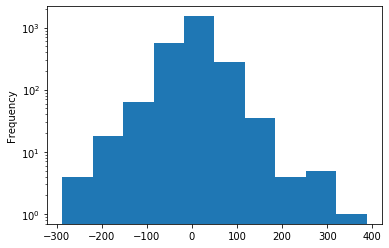

In [52]:
trends2.plot.hist(log=True)

In [53]:
np.mean(trends2)

3.884037878049116

In [54]:
np.std(trends2)

50.12741908967228

In [56]:
households = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/hh_demographic.csv")

In [61]:
merged = trends2.rename("Trend").to_frame().merge(households, left_index=True, right_on="household_key")

In [62]:
merged

,Trend,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,9.562239,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,33.280725,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,32.625022,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,10.406222,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,-44.562364,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...,...
796,-7.742452,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,-16.269356,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,17.140843,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,-11.633437,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [74]:
def plot_trends_by_group(group):
    vals = sorted(merged[group].unique())
    for val in vals:
        tr = merged[merged[group] == val]["Trend"]
        tr.plot.hist(label=val)
        plt.title(val + ", mean: " + str(np.mean(tr)))
        plt.show()
        

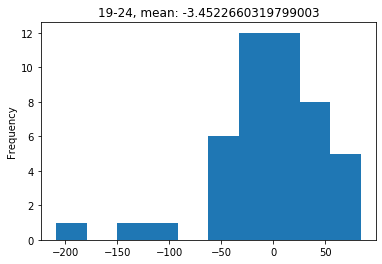

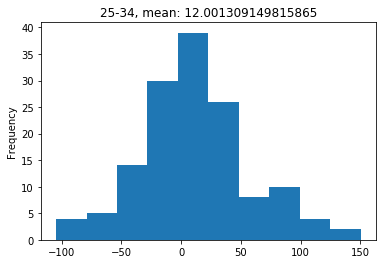

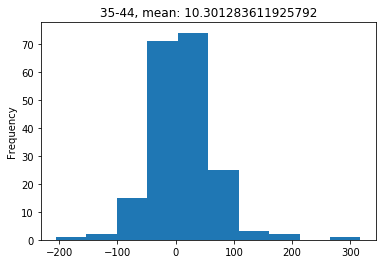

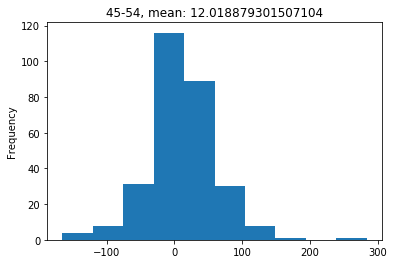

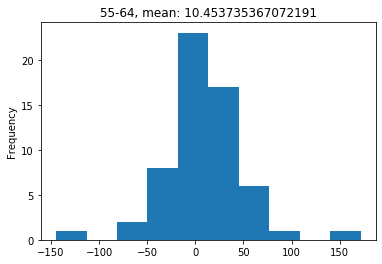

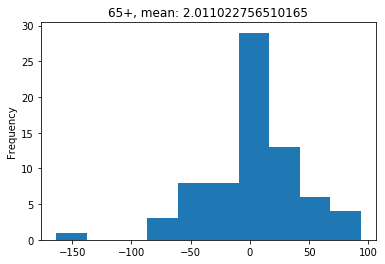

In [75]:
plot_trends_by_group("AGE_DESC")

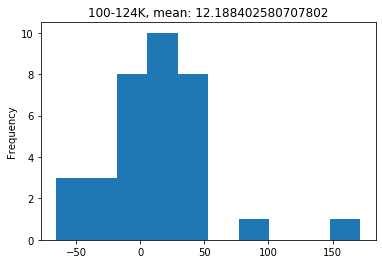

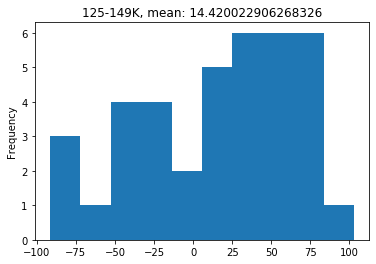

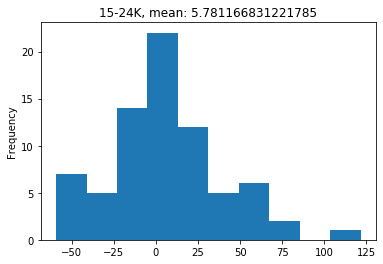

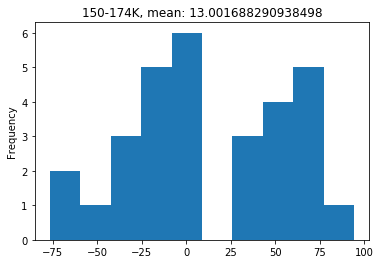

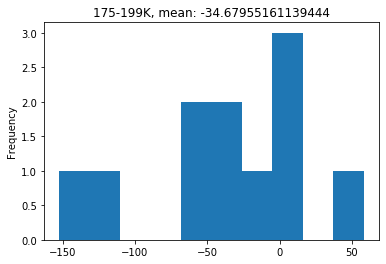

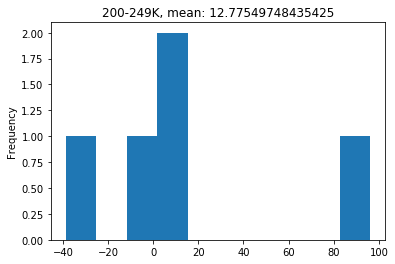

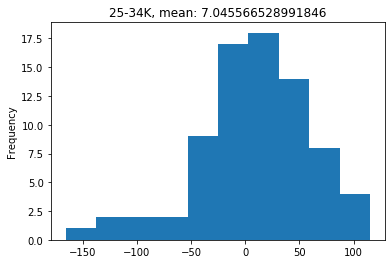

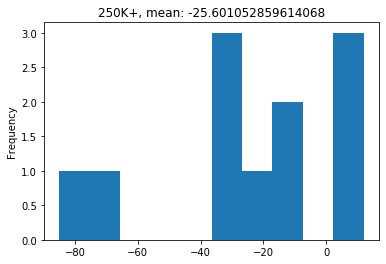

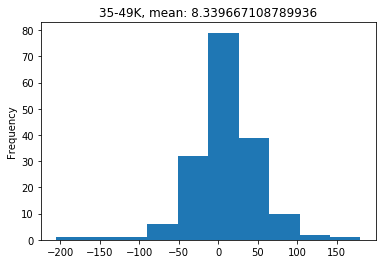

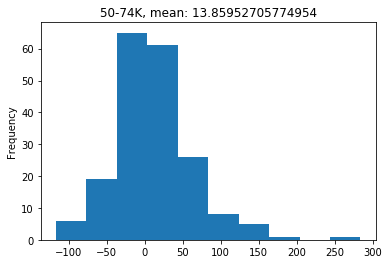

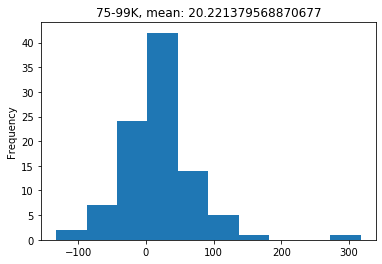

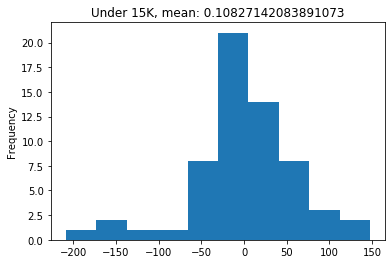

In [78]:
plot_trends_by_group("INCOME_DESC")